In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')

import pandas as pd
import numpy as np
import pickle
import math
import sklearn
import glob
from tqdm.auto import tqdm
from sklearn.linear_model import LinearRegression
import proplot as plot

In [15]:
depickle(glob.glob('./store/rmse_mae/storestuff_noncausalmlr_mae.pkl')[0])

array([[ 1.21,  0.63,  0.07, 10.42,  6.15,  0.85,  7.71,  4.44,  0.44],
       [ 2.9 ,  1.54,  0.17,  3.74,  2.07,  0.22,  3.11,  1.7 ,  0.21],
       [ 3.37,  1.56,  0.19,  5.11,  2.32,  0.24,  4.14,  2.17,  0.24],
       [ 3.03,  1.76,  0.17,  4.07,  1.97,  0.22,  3.4 ,  1.93,  0.22]])

In [7]:
1.477000e+01

14.77

In [3]:
import sys
sys.path.insert(1,'../')
import preprocess
p1="../../timeseries_csv/ts_wp/"
p2="../../../targets/"

ds47=preprocess._process_dataset(glob.glob(p1+'*2010OMAIS*')[0])
tcwp47=ds47.values
var_names=ds47.columns.values.tolist()

In [1]:
def depickle(loc=None):
    output = []
    with open(loc,'rb') as f:
        output.append(pickle.load(f))
    return output[0]

def flatten(l):
    return [item for sublist in l for item in sublist]

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
def remove_strange_pred_aligned(TYPE='pmin',pred=None,truth=None):
    truth=np.asarray(truth)
    pred=np.asarray(pred)
    truth = truth[(pred>0) & (pred<10000)]
    pred = pred[(pred>0) & (pred<10000)]
    return truth,pred

def give_r2(filelocs='./WPAC/pcmci_2tau16/causalwpac_pmin_2tau16.obj.',
            suffix=str('*12348'),pc_alpha=[0.1]):
    store_r2train,store_r2test,store_size = [],[],[]
    #for pc_alpha in tqdm([0.01,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]):
    for pc_alpha in tqdm(pc_alpha):
        #filelist = sorted(glob.glob('./combinedscript/pickleddata2/12348/*pmin*.obj.0.2.*.12348'))
        filelistt =sorted(glob.glob(filelocs+str(pc_alpha)+suffix))[5::-1]+\
        sorted(glob.glob(filelocs+str(pc_alpha)+suffix))[6:]
        files = [depickle(obj) for obj in filelistt]
        temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
        temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],\
                                file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
        temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
        store_r2train.append(temp_r2train)
        store_r2test.append(temp_r2test)
        store_size.append(temp)
    storedict_pcmci = {'r2_train':store_r2train,'r2_test':store_r2test,'size':store_size}
    del store_r2train,store_r2test,store_size
    return storedict_pcmci

def give_r2_pcstable(filelocs='./WPAC/pcstable_2tau16/newcausalwpac_2-16_pmin*',filelists=None):
    store_r2train,store_r2test,store_size = [],[],[]
    for pc_alpha in tqdm([0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]):
        filelist = sorted(glob.glob(filelocs))
        files = [depickle(obj) for obj in filelist]
        temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
        temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],\
                                file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
        temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
        store_r2train.append(temp_r2train)
        store_r2test.append(temp_r2test)
        store_size.append(temp)
    storedict_pcstable = {'r2_train':store_r2train,'r2_test':store_r2test,'size':store_size}
    del store_r2train,store_r2test,store_size
    return storedict_pcstable

def give_r2_aligned(filelist=None):
    store_r2train,store_r2test_old,store_r2test_new,store_size = [],[],[],[]
    files = [depickle(obj) for obj in filelist]
    for file in files:
        temp_r2train = r2_score(file['y']['train'],file['mlr'].predict(file['X']['train']))
        temp_r2test_old = r2_score(file['y']['valid']+file['y']['test'],file['mlr'].predict(file['X']['valid']+file['X']['test']))
        temp_r2test_new = r2_score(file['y']['newtest'],file['mlr'].predict(file['X']['newtest']))
        temp = np.asarray([list(obj) for obj in file['X']['train']]).shape[1]
        store_r2train.append(temp_r2train)
        store_r2test_old.append(temp_r2test_old)
        store_r2test_new.append(temp_r2test_new)
        store_size.append(temp)
    storedict_pcstable = {'r2_train':store_r2train,'r2_test_old':store_r2test_old,'r2_test_new':store_r2test_new,'size':store_size}
    del store_r2train,store_r2test_old,store_r2test_new,store_size
    return storedict_pcstable

def give_r2_random(filelocs='./pickleddata_random/12348/randomwpall_2_16*pmin*'):
    random_files = sorted(glob.glob(filelocs))
    store_r2train,store_r2test_old,store_r2test_new,store_size = [],[],[],[]
    for pc_alpha in tqdm(range(len(random_files))):
        #filelist = sorted(glob.glob('./combinedscript/pickleddata2/12348/*pmin*.obj.0.2.*.12348'))
        files = [depickle(obj) for obj in random_files]
        temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
        temp_r2test_old = [r2_score(file['y']['valid']+file['y']['test'],\
                                file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
        temp_r2test_new = [r2_score(file['y']['newtest'],file['mlr'].predict(file['X']['newtest'])) for file in files]
        temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
        store_r2train.append(temp_r2train)
        store_r2test_old.append(temp_r2test_old)
        store_r2test_new.append(temp_r2test_new)
        store_size.append(temp)
    storedict_random = {'r2_train':store_r2train,'r2_test_old':store_r2test_old,'r2_test_new':store_r2test_new,'size':store_size}
    del store_r2train,store_r2test_old,store_r2test_new,store_size
    return storedict_random

def give_r2_lag(filelocs='./pickleddata_lag/12348/lagwpacall8_24*pmin*'):
    fileslist = glob.glob(filelocs)[5::-1]+glob.glob(filelocs)[6:]
    files = [depickle(obj) for obj in fileslist]
    temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
    temp_r2test_old = [r2_score(file['y']['valid']+file['y']['test'],file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
    temp_r2test_new = [r2_score(file['y']['newtest'],file['mlr'].predict(file['X']['newtest'])) for file in files]
    temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
    storedict_lag = {'r2_train':temp_r2train,'r2_test_old':temp_r2test_old,'r2_test_new':temp_r2test_new,'size':temp}
    #del store_r2train,store_r2test,store_size
    return storedict_lag

In [13]:
import rfreg_funcs

## Figure 2

In [15]:
pcstable_path = '/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/parallel_tigramite/newdata/'
alpha_level = [float(obj.split('/')[-1].split('_')[-1][11-2:-6]) for obj in sorted(glob.glob(pcstable_path+'pcstablewpac*aligned_8-24*pmin*'))]
pmin_PC1models = [depickle(obj) for obj in sorted(glob.glob(pcstable_path+'pcstablewpac*aligned_8-24*pmin.obj.*'))]
PC1modelsize = [float(np.asarray(obj['X']['train']).shape[-1]) for obj in pmin_PC1models]

In [16]:
r2=[r2_score(obj['y']['valid']+obj['y']['test'],\
         obj['mlr'].predict(obj['X']['valid']+obj['X']['test'])) for obj in pmin_PC1models]

In [30]:
dff = pd.DataFrame({'alpha_level':np.asarray(alpha_level),'size':PC1modelsize,'r2':r2})
dff_sorted = dff.sort_values(by='alpha_level')

In [31]:
import rfreg_funcs
rfreg_funcs.save_to_pickle('./fig2_r2_824_pmin.pkl',dff)

In [ ]:
#import matplotlib
#matplotlib.rcParams['font.sans-serif'] = "Norasi"
#matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plot.subplots(nrows=1,ncols=1)
ax[0].scatter(np.linspace(7,37,31),dff_sorted['size'][7:],s=20,edgecolor='k',alpha=0.6)
ax[0].format(xticks=list(np.linspace(7,37,31)[::3]),xticklabels=[str(np.round(obj,decimals=3)) for obj in dff_sorted['alpha_level']][7:][::3],
             xlabel='$PC_{\alpha}$',ylabel='Number of Inputs',title='PC1; Pmin; WPAC')
#ax.set_xticks(np.linspace(7,37,31))
#ax.set_xticklabels([np.round(obj,decimals=3) for obj in dff_sorted['alpha_level']][7:])

#ax.set_xlabel('$PC_{\alpha}$',size=11)
#ax.set_ylabel('Number of Inputs',size=11)
#ax.grid(alpha=0.2,lw=1.5,ls='--')
#ax.set_title(f'$r^2$, Precip',loc='left')
#ax.set_title('PC1; Pmin; WPAC')
#ax.set_xlim(0,1100)
#ax.set_xlim(0,1050)
#ax.set_ylim(0.80,1)
#plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large_precipzoom.png',dpi=400,facecolor='w')
plt.show()

## Load pcstable and pcmci - aligned files

In [78]:
#####################################################################################################################################
# Read files (PC1)
listtt_mlr = (sorted(glob.glob('/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/parallel_tigramite/newdata/pcstablewpac_aligned_8-24_pmin*')))
# Wrong order to correct...
aligned2_16_list_mlr = [listtt_mlr[-1],listtt_mlr[-4],listtt_mlr[-2],listtt_mlr[-5],listtt_mlr[-3],listtt_mlr[-6]]
for obj in listtt_mlr[:-6]:
    aligned2_16_list_mlr.append(obj)
#####################################################################################################################################    
#pcmci_wpac_2tau16 = give_r2()
pcstable_wpac_2tau16 = give_r2_aligned(aligned2_16_list_mlr)

#####################################################################################################################################
# Read files (PCMCI)
#listtt = (sorted(glob.glob('/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/parallel_tigramite/data/pcmciwpac*aligned_8-24*pmin.obj.0.05*')))
#aligned2_16_listPCMCI = [listtt[-1],listtt[-3],listtt[-2],listtt[-4]]
#for obj in listtt[:-4]:
#    aligned2_16_listPCMCI.append(obj)
#####################################################################################################################################    
#pcmci_wpac_2tau16 = give_r2_aligned(aligned2_16_listPCMCI)

In [79]:
lag_wpac_2tau16 = give_r2_lag('./store/lag/12348/lagwpacall8_24*pmin*')
######################################################################################
# Output for Figure 4
storelag = {'filename':glob.glob('./store/lag/12348/lagwpacall8_24*pmin*')[5::-1]+glob.glob('./store/lag/12348/lagwpacall8_24*pmin*')[6:],
            'r2_old': lag_wpac_2tau16['r2_test_old'],'r2_new': lag_wpac_2tau16['r2_test_new'],'r2_train': lag_wpac_2tau16['r2_train']}

In [80]:
random_wpac_8tau24 = give_r2_lag('./store/random/12348/randomwpallnewtest_8_24*pmin*')

In [81]:
#####################################################################################################################################
# Read files (RFreg)
listtt = (sorted(glob.glob('./store/rf_feature/12348/rfregall8_24*pmin.obj.*')))
#####################################################################################################################################    
rfreg_wpac_2tau16 = give_r2_aligned(listtt)

### Plotting Aligned

#### Figure 4

In [68]:
import cmaps

In [82]:
plot.rc.metacolor='k'
plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontsize':11,'linewidth':1.25})
plot.rc.axesfacecolor='w'

/tmp/ipykernel_862489/1385577474.py:2: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'axes.labelweight':'normal','tick.labelweight':'normal','figure.facecolor':'w','title.color':'k','fontsize':11,'linewidth':1.25})


In [84]:
np.asarray(rfreg_wpac_2tau16['r2_train']).flatten()

array([0.90364935, 0.94461941, 0.94488349, 0.94523112, 0.94568912,
       0.94623547, 0.90652241, 0.90822559, 0.90995723, 0.9117157 ,
       0.87334928, 0.91302634, 0.91558941, 0.91851561, 0.92012659,
       0.92157006, 0.92253015, 0.92378598, 0.92427291, 0.92496622,
       0.92643708, 0.88010204, 0.92753935, 0.9283238 , 0.92898114,
       0.9303544 , 0.93181304, 0.93260925, 0.9335712 , 0.93458538,
       0.93493899, 0.93521523, 0.89461369, 0.93602546, 0.93635646,
       0.93695574, 0.93800318, 0.9387039 , 0.93903805, 0.93986272,
       0.94011025, 0.94083125, 0.94148623, 0.90010246, 0.94177569,
       0.94210939, 0.94262045, 0.94278816, 0.94320965, 0.9434279 ,
       0.9435998 , 0.94388801, 0.94425659, 0.94440524])

/tmp/ipykernel_862489/3941437428.py:33: ProplotWarning: fig.tight_layout() has no effect on proplot figures. Proplot uses its own tight layout algorithm that is activated by default. To disable it, set pplt.rc['subplots.tight'] to False or pass tight=False to pplt.subplots(). For details, see fig.auto_layout().
  plt.tight_layout()


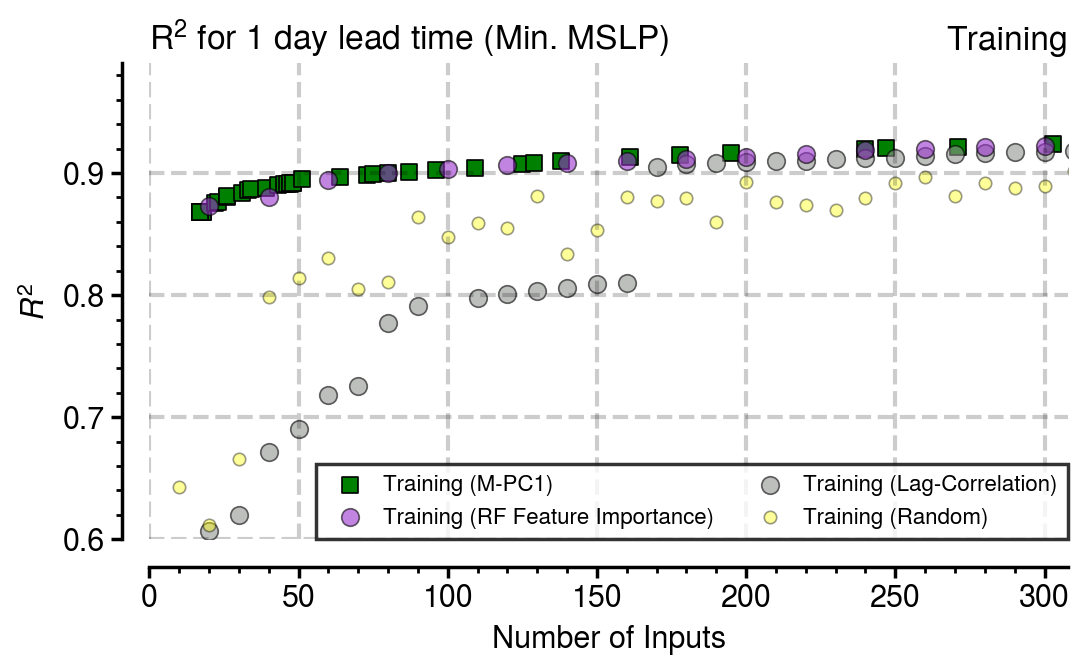

In [91]:
fig,ax = plot.subplots(nrows=1,ncols=1,axwidth=4.595,refaspect=1.931)
#ax[0].scatter(np.asarray(pcmci_wpac_2tau16['size']).flatten(),np.asarray(pcmci_wpac_2tau16['r2_train']).flatten(),\
#            s=30,label='Training (M-PCMCI)',edgecolor='k',alpha=0.6)
ax[0].scatter(np.asarray(pcstable_wpac_2tau16['size']).flatten(),np.asarray(pcstable_wpac_2tau16['r2_train']).flatten(),\
            s=30,label='Training (M-PC1)',edgecolor='k',marker='s',color='g')
ax[0].scatter(np.asarray(lag_wpac_2tau16['size']).flatten(),np.asarray(lag_wpac_2tau16['r2_train']).flatten(),
            s=40,label='Training (Lag-Correlation)',edgecolor='k',alpha=0.6,c='gray')
ax[0].scatter(np.asarray(rfreg_wpac_2tau16['size']).flatten(),np.asarray(rfreg_wpac_2tau16['r2_train']).flatten(),
            s=40,label='Training (RF Feature Importance)',edgecolor='k',alpha=0.6,c='darkorchid')
ax[0].scatter(np.asarray(random_wpac_8tau24['size']).flatten(),np.asarray(random_wpac_8tau24['r2_train']).flatten(),
            s=20,label='Training (Random)',edgecolor='k',alpha=0.4,c='yellow',marker='o')
#ax[0].scatter(np.asarray(pcmci_wpac_2tau16['size']).flatten(),np.asarray(pcmci_wpac_2tau16['r2_test']).flatten(),\
#            s=20,label='M-PCMCI (Validation)',edgecolor='k',alpha=0.6)
#ax[0].scatter(np.asarray(pcstable_wpac_2tau16['size']).flatten(),np.asarray(pcstable_wpac_2tau16['r2_test']).flatten(),\
#            s=30,label='M-PC1 (Validation)',edgecolor='k',marker='s',color='#d7f2ae')

#plt.scatter(np.asarray(random_wpac_2tau16['size']).flatten(),np.asarray(random_wpac_2tau16['r2_train']).flatten(),
#            s=40,label='Training (random)',edgecolor='k',alpha=0.6,c='yellow',marker='o')
#plt.scatter(np.asarray(random_wpac_2tau16['size']).flatten(),np.asarray(random_wpac_2tau16['r2_test']).flatten(),
#            s=40,label='Validation (random)',edgecolor='k',alpha=0.6,c='green',marker='o')
#plt.scatter(np.asarray(lag_wpac_2tau16['size']).flatten(),np.asarray(lag_wpac_2tau16['r2_test']).flatten(),
#            s=40,label='Test (Lag-Correlation)',edgecolor='k',alpha=0.6,c='m',marker='*')
#ax[0].format(rtitle='Training')
#ax[1].format(rtitle='Validation')
ax.format(ylabel='$\it{R^{2}}$',xlabel='Number of Inputs',ltitle=f'$R^2$ for 1 day lead time (Min. MSLP)',xlim=[0,308],ylim=[0.6,.99],rtitle='Training')#ylim=[0.705,0.946])
ax.legend(loc=4,ncol=2,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('./plots_output/fig3_revised_training_pmin.png',dpi=600,facecolor='w')
plt.show()

/tmp/ipykernel_862489/1186476871.py:32: ProplotWarning: fig.tight_layout() has no effect on proplot figures. Proplot uses its own tight layout algorithm that is activated by default. To disable it, set pplt.rc['subplots.tight'] to False or pass tight=False to pplt.subplots(). For details, see fig.auto_layout().
  plt.tight_layout()


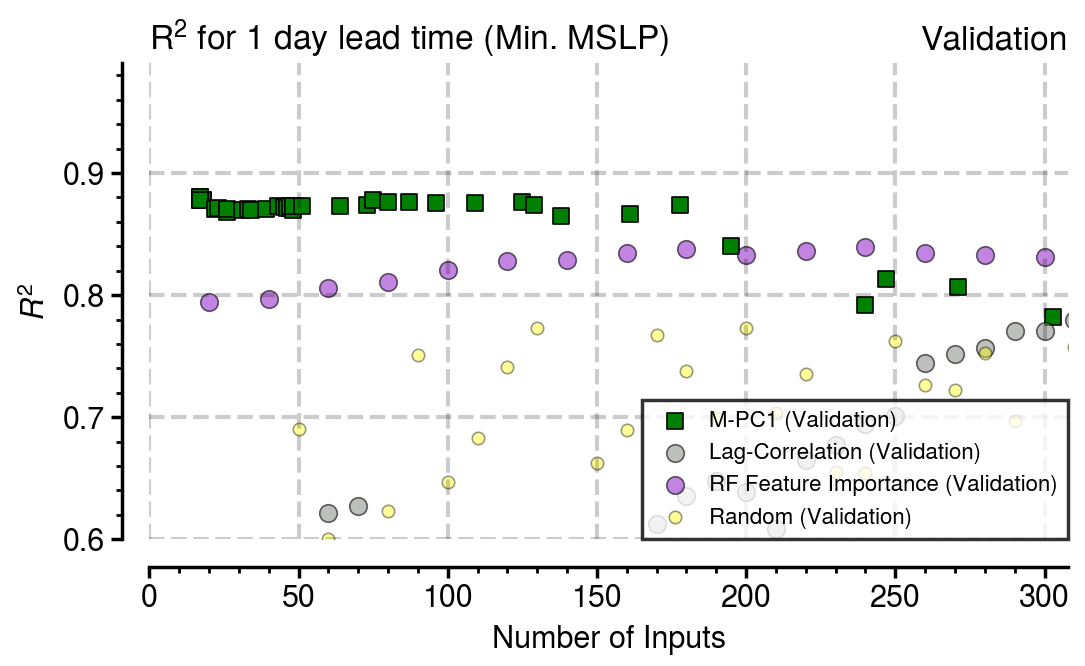

In [90]:
fig,ax = plot.subplots(nrows=1,ncols=1,axwidth=4.595,refaspect=1.931)
#ax[0].scatter(np.asarray(pcmci_wpac_2tau16['size']).flatten(),np.asarray(pcmci_wpac_2tau16['r2_test']).flatten(),\
#            s=30,label='M-PCMCI (Validation)',edgecolor='k',alpha=0.6)
ax[0].scatter(np.asarray(pcstable_wpac_2tau16['size']).flatten(),np.asarray(pcstable_wpac_2tau16['r2_test_old']).flatten(),\
            s=30,label='M-PC1 (Validation)',edgecolor='k',marker='s',color='g')
ax[0].scatter(np.asarray(lag_wpac_2tau16['size']).flatten(),np.asarray(lag_wpac_2tau16['r2_test_old']).flatten(),
            s=40,label='Lag-Correlation (Validation)',edgecolor='k',alpha=0.6,c='gray')
ax[0].scatter(np.asarray(rfreg_wpac_2tau16['size']).flatten(),np.asarray(rfreg_wpac_2tau16['r2_test_old']).flatten(),
            s=40,label='RF Feature Importance (Validation)',edgecolor='k',alpha=0.6,c='darkorchid')
plt.scatter(np.asarray(random_wpac_8tau24['size']).flatten(),np.asarray(random_wpac_8tau24['r2_test_old']).flatten(),
            s=20,label='Random (Validation)',edgecolor='k',alpha=0.4,c='yellow',marker='o')

#ax[0].scatter(np.asarray(pcmci_wpac_2tau16['size']).flatten(),np.asarray(pcmci_wpac_2tau16['r2_test']).flatten(),\
#            s=20,label='M-PCMCI (Validation)',edgecolor='k',alpha=0.6)
#ax[0].scatter(np.asarray(pcstable_wpac_2tau16['size']).flatten(),np.asarray(pcstable_wpac_2tau16['r2_test']).flatten(),\
#            s=30,label='M-PC1 (Validation)',edgecolor='k',marker='s',color='#d7f2ae')

#plt.scatter(np.asarray(random_wpac_2tau16['size']).flatten(),np.asarray(random_wpac_2tau16['r2_test']).flatten(),
#            s=40,label='Validation (random)',edgecolor='k',alpha=0.6,c='green',marker='o')
#plt.scatter(np.asarray(lag_wpac_2tau16['size']).flatten(),np.asarray(lag_wpac_2tau16['r2_test']).flatten(),
#            s=40,label='Test (Lag-Correlation)',edgecolor='k',alpha=0.6,c='m',marker='*')
#ax[0].format(rtitle='Training')
#ax[1].format(rtitle='Validation')
ax.format(ylabel='$\it{R^{2}}$',xlabel='Number of Inputs',ltitle=f'$R^2$ for 1 day lead time (Min. MSLP)',xlim=[0,308],ylim=[0.6,0.99],rtitle='Validation')#ylim=[0.705,0.946])
ax.legend(loc=4,ncol=1,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('./plots_output/fig3_revised_validation_pmin.png',dpi=600,facecolor='w')
plt.show()

/tmp/ipykernel_862489/2529472657.py:32: ProplotWarning: fig.tight_layout() has no effect on proplot figures. Proplot uses its own tight layout algorithm that is activated by default. To disable it, set pplt.rc['subplots.tight'] to False or pass tight=False to pplt.subplots(). For details, see fig.auto_layout().
  plt.tight_layout()


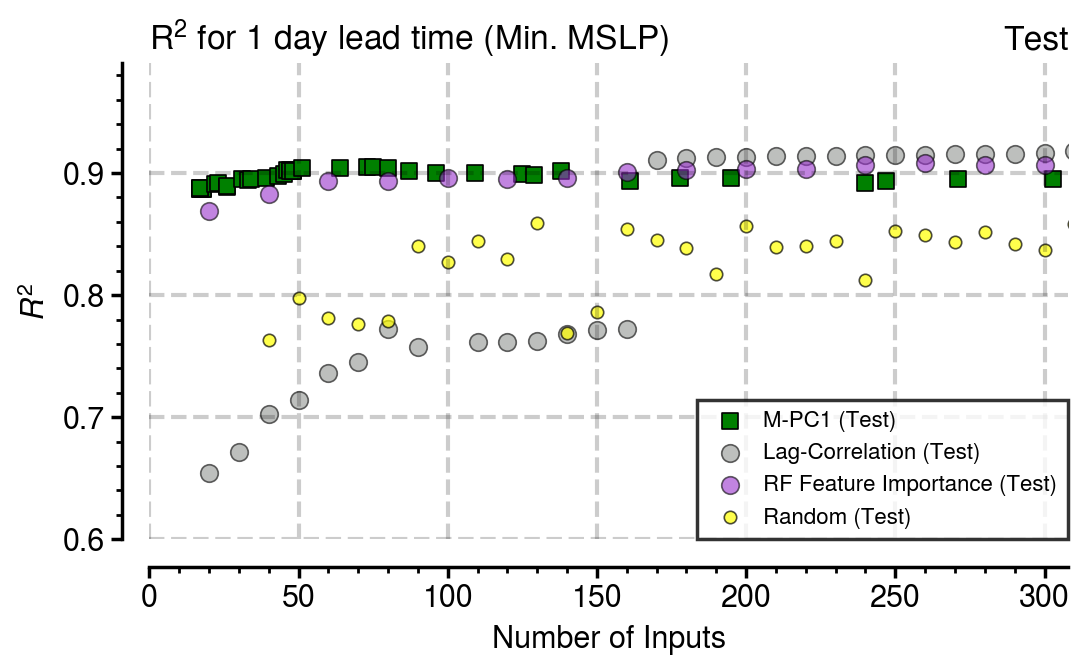

In [89]:
fig,ax = plot.subplots(nrows=1,ncols=1,axwidth=4.595,refaspect=1.931)
#ax[0].scatter(np.asarray(pcmci_wpac_2tau16['size']).flatten(),np.asarray(pcmci_wpac_2tau16['r2_test']).flatten(),\
#            s=30,label='M-PCMCI (Validation)',edgecolor='k',alpha=0.6)
ax[0].scatter(np.asarray(pcstable_wpac_2tau16['size']).flatten(),np.asarray(pcstable_wpac_2tau16['r2_test_new']).flatten(),\
            s=30,label='M-PC1 (Test)',edgecolor='k',marker='s',color='g')
ax[0].scatter(np.asarray(lag_wpac_2tau16['size']).flatten(),np.asarray(lag_wpac_2tau16['r2_test_new']).flatten(),
            s=40,label='Lag-Correlation (Test)',edgecolor='k',alpha=0.6,c='gray')
ax[0].scatter(np.asarray(rfreg_wpac_2tau16['size']).flatten(),np.asarray(rfreg_wpac_2tau16['r2_test_new']).flatten(),
            s=40,label='RF Feature Importance (Test)',edgecolor='k',alpha=0.6,c='darkorchid')
ax[0].scatter(np.asarray(random_wpac_8tau24['size']).flatten(),np.asarray(random_wpac_8tau24['r2_test_new']).flatten(),
            s=20,label='Random (Test)',edgecolor='k',alpha=0.7,c='yellow',marker='o')

#ax[0].scatter(np.asarray(pcmci_wpac_2tau16['size']).flatten(),np.asarray(pcmci_wpac_2tau16['r2_test']).flatten(),\
#            s=20,label='M-PCMCI (Validation)',edgecolor='k',alpha=0.6)
#ax[0].scatter(np.asarray(pcstable_wpac_2tau16['size']).flatten(),np.asarray(pcstable_wpac_2tau16['r2_test']).flatten(),\
#            s=30,label='M-PC1 (Validation)',edgecolor='k',marker='s',color='#d7f2ae')

#plt.scatter(np.asarray(random_wpac_2tau16['size']).flatten(),np.asarray(random_wpac_2tau16['r2_test']).flatten(),
#            s=40,label='Validation (random)',edgecolor='k',alpha=0.6,c='green',marker='o')
#plt.scatter(np.asarray(lag_wpac_2tau16['size']).flatten(),np.asarray(lag_wpac_2tau16['r2_test']).flatten(),
#            s=40,label='Test (Lag-Correlation)',edgecolor='k',alpha=0.6,c='m',marker='*')
#ax[0].format(rtitle='Training')
#ax[1].format(rtitle='Validation')
ax.format(ylabel='$\it{R^{2}}$',xlabel='Number of Inputs',ltitle=f'$R^2$ for 1 day lead time (Min. MSLP)',xlim=[0,308],ylim=[0.6,0.99],rtitle='Test')#ylim=[0.705,0.946])
ax.legend(loc=4,ncol=1,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('./plots_output/fig3_revised_test_pmin.png',dpi=600,facecolor='w')
plt.show()